<a href="https://colab.research.google.com/github/Kaushal-Top5699/tensorflow_cnn_cv/blob/main/tensorflow_cnn_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks and Computer Vision with TensorFlow**



In [1]:
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip
zip_ref = zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-05-15 19:23:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.6MB/s    in 3.5s    

2023-05-15 19:23:10 (29.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## **Inspect Data**

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

In [5]:
# Walk through pizza steak directory and list number of files.
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 15 19:23 .
drwxr-xr-x 1 root root 4096 May 15 19:23 ..
drwxr-xr-x 4 root root 4096 May 15 19:23 test
drwxr-xr-x 4 root root 4096 May 15 19:23 train


In [7]:
# Another way to find out how many images in the file.
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [8]:
# Get class names programmatically.
import pathlib
import matplotlib.image as mpimg
import random

In [9]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [10]:
# Lets visualize our images.
def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path.
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot it.
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {image.shape}")
  return image

['3770370.jpg']
Image Shape: (512, 512, 3)


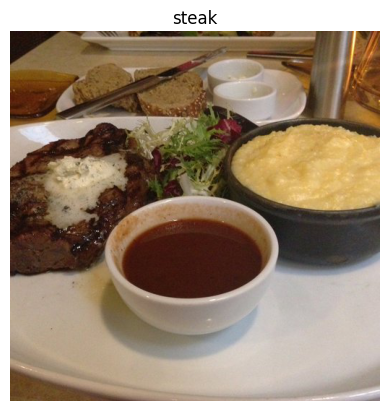

In [11]:
# View a random image from training
steak_image = view_random_image("pizza_steak/train/", "steak")

['1681043.jpg']
Image Shape: (512, 384, 3)


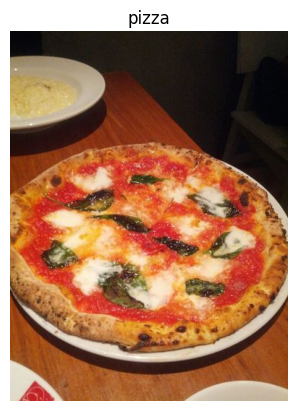

In [12]:
pizza_image = view_random_image("pizza_steak/train/", "pizza")

In [13]:
# We can covert these images into Tensors.
tf.constant(pizza_image[0])

<tf.Tensor: shape=(384, 3), dtype=uint8, numpy=
array([[ 4,  3,  8],
       [ 7,  6, 11],
       [ 8,  7, 12],
       ...,
       [29, 24, 20],
       [31, 23, 20],
       [32, 24, 21]], dtype=uint8)>

In [14]:
pizza_image.shape # Returns width, hight and color channels.

(512, 384, 3)

### **Few things to do first**

1. Tensorflow understands number and images.
2. Make sure tensors are of right shape.
3. Scaling of data (Normalise or Standardise) that is, getting all the values in tensors between 0 and 1. We do it by dividing pixel values by 255, because that's the max size of a pixel.

Lets build the Convolutional Neural Network to find patterns in our images.

1. Load our images.
2. Preprocess our images (getting into tensor format).
3. Build our CNN to find patterns in our images.
4. Compile the CNN.
5. Fit the CNN to our training data.


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
tf.random.set_seed(42)

# Preprocess Data (get all of pixel values between 0 and 1), this is scaling or normalising.
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories.
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               batch_size = 32, 
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build CNN model (same as tiny VGG on the CNN explainer website).
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D((2, 2), padding = "valid"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")                                                             
])

# Compile our CNN.
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
# Fit the model.
history = model_1.fit(train_data, 
                      epochs = 5, 
                      steps_per_epoch = len(train_data), 
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 213ms/step - loss: 0.6000 - accuracy: 0.6547 - val_loss: 0.4165 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4487 - accuracy: 0.8027 - val_loss: 0.3730 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4415 - accuracy: 0.7993 - val_loss: 0.3390 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3832 - accuracy: 0.8393 - val_loss: 0.3126 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3490 - accuracy: 0.8647 - val_loss: 0.3414 - val_accuracy: 0.8520


**We switched to GPUs to run these epochs faster.**

In [18]:
import keras
from matplotlib import pyplot as plt
def plot_curves(history, need_1, need_2):
  plt.plot(history.history[need_1])
  plt.plot(history.history[need_2])
  plt.title(f'Model {need_1}')
  plt.ylabel(f'{need_1}')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

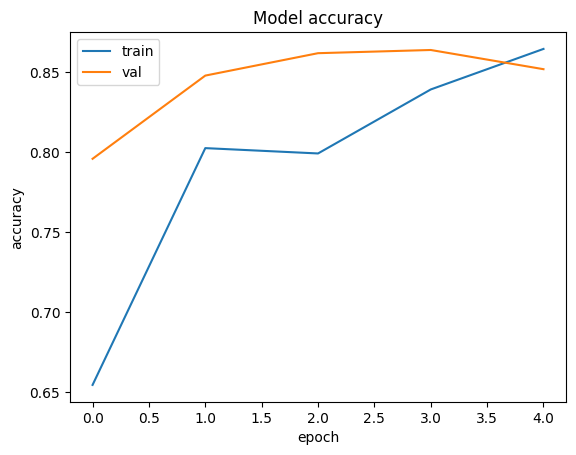

In [19]:
plot_curves(history, "accuracy", "val_accuracy")

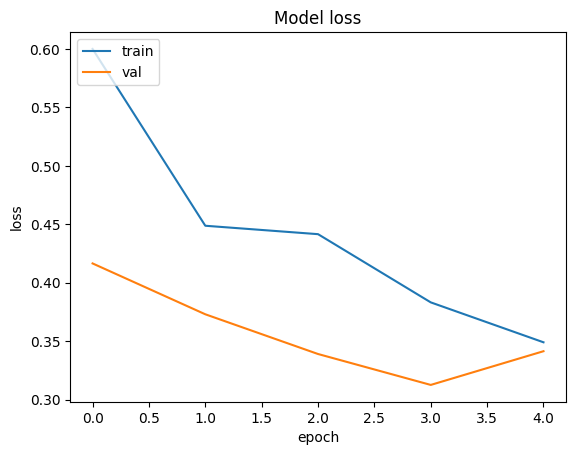

In [20]:
plot_curves(history, "loss", "val_loss")

##As you can see validation accuracy is dropping gradually and validation is loss is increasing shaprly, this indicates that our model is **overfitting**. We may apply few techniques in order to reduce the **overfitting**.

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Here's a model without CNN.

In [ ]:
# Model without CNN.
tf.random.set_seed(42)

# Model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_2 = model_2.fit(train_data, 
            epochs = 10, 
            steps_per_epoch = len(train_data), 
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 11s 221ms/step - loss: 0.9532 - accuracy: 0.4847 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 10s 214ms/step - loss: 0.7061 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 10s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000

### Lets plot the accuracy and loss curves to check **Overfitting**.

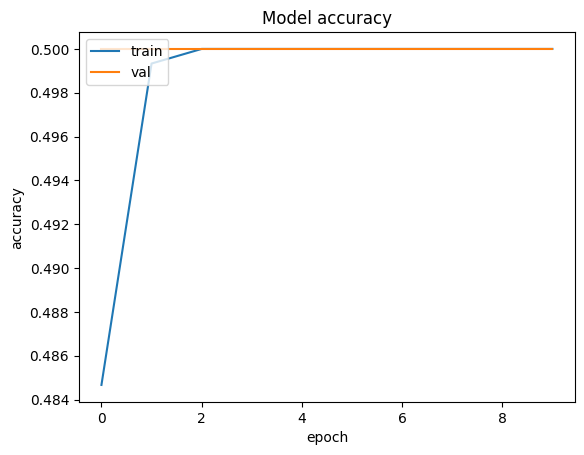

In [ ]:
plot_curves(history_2, "accuracy", "val_accuracy")

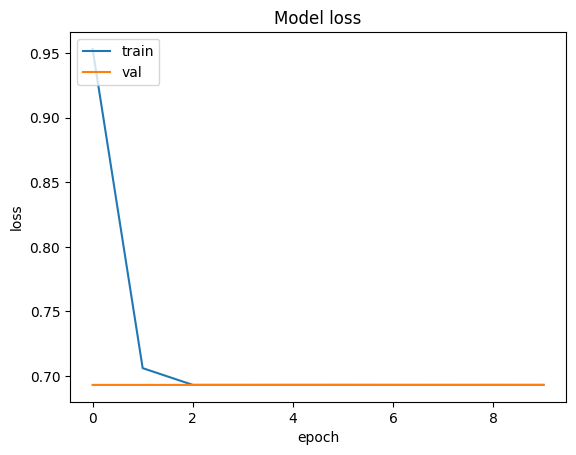

In [ ]:
plot_curves(history_2, "loss", "val_loss")

Highly unstable, chance of **Overfitting**.

In [ ]:
# Model without CNN with slight improvements.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_3 = model_3.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data), 
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 234ms/step - loss: 3.3635 - accuracy: 0.6273 - val_loss: 1.7618 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.8424 - accuracy: 0.6720 - val_loss: 0.9957 - val_accuracy: 0.6640
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5651 - accuracy: 0.7620 - val_loss: 0.4355 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 11s 224ms/step - loss: 0.5267 - accuracy: 0.7640 - val_loss: 0.4325 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4676 - accuracy: 0.8067 - val_loss: 0.4246 - val_accuracy: 0.7980


Lets check the curves for accuracy and loss for **Model 3**.

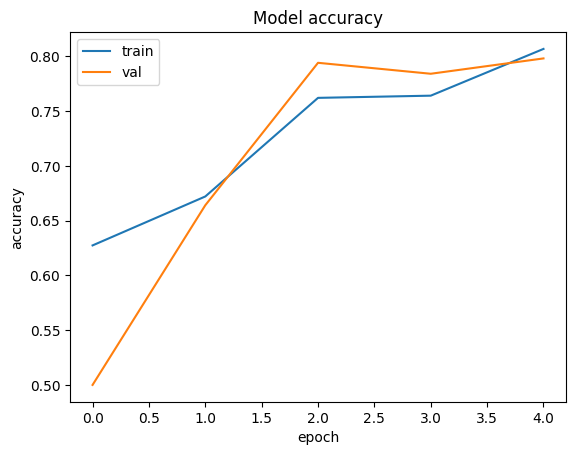

In [ ]:
plot_curves(history_3, "accuracy", "val_accuracy")

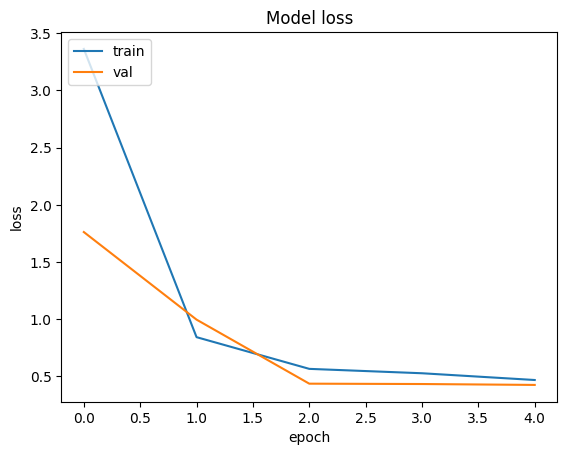

In [ ]:
plot_curves(history_3, "loss", "val_loss")

### As you can see a simple change in model, that is, by using CNN's flatten layer only we can improved the model's performance and reduced the overfitting.

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


### As you can the total parameters in CNN were 31K and without CNN improved model_3 has a total of 15 million parameters, this shows how powerful CNN is.

## Breaking down our binary classification model.

1. Become one with Data (Visualize).
2. Preprocess the data (Scaling/Normalising).
3. Create a model.
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and try to improve the model.
7. Repeat until satisfied.

### 1. Becoming one with Data.

['187521.jpg']
Image Shape: (382, 512, 3)
['947246.jpg']
Image Shape: (512, 512, 3)


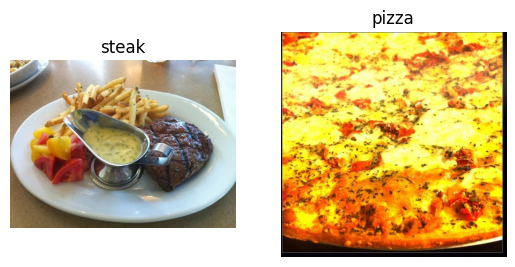

In [22]:
# Become one with data.
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [23]:
# Preprocessing the data (getting it ready for the model).
# Define directory dataset paths.
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

### 2. Next step is to turn our data into **batches**. We are preprocessing.

Instead of looking at all the 10k images in our dataset, the model could look at only 32 at a time. Therefore, the default batch_size is always 32.

The reason for this is:

1. 10,000 images or more might not fit into the computer's processor (GPU).
2. Trying to fit in 10,000 images at once might not help our model to learn very well.
 

**Normalization of data.**

In [24]:
# Create train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)
# Getting all tensor values between 0 and 1.

**Creating batches of data, were each batch size is 32.**

In [25]:
# Load in our images from directories and turn them into batches.
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get sample of train data batch.
images, labels = train_data.next() # Gets the next batch of images and labels of train_data
len(images), len(labels)
# Both are lists each containg 32 items. 

(32, 32)

In [27]:
# How many batches in data?
len(train_data)

47

A total of 47 batches (1500/32)

In [28]:
1500/32

46.875

In [ ]:
# Get the first two images.
images[:2], images[0].shape

In [29]:
# Get the first batch of labels.
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

### **Let's start by creating a simple CNN model, without pooling.**

In [30]:
# Model 4
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, # Filter is number of sliding windows going across the input.
                           (3, 3), # Size of sliding window.
                           strides = (1, 1), # Size of step the sliding window taks on input.
                           padding = "valid", # If valid it compresses the image, and if same it keeps the input in the original shape.
                           activation = "relu", 
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
 model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_data, 
                        epochs = 10, 
                        steps_per_epoch = len(train_data), 
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 34s 707ms/step - loss: 0.6629 - accuracy: 0.6873 - val_loss: 0.4257 - val_accuracy: 0.8020
Epoch 2/10
47/47 [==============================] - 33s 705ms/step - loss: 0.4092 - accuracy: 0.8273 - val_loss: 0.3973 - val_accuracy: 0.8360
Epoch 3/10
47/47 [==============================] - 33s 701ms/step - loss: 0.2990 - accuracy: 0.8847 - val_loss: 0.3712 - val_accuracy: 0.8300
Epoch 4/10
47/47 [==============================] - 33s 700ms/step - loss: 0.1661 - accuracy: 0.9473 - val_loss: 0.5347 - val_accuracy: 0.7420
Epoch 5/10
47/47 [==============================] - 33s 692ms/step - loss: 0.0852 - accuracy: 0.9787 - val_loss: 0.4452 - val_accuracy: 0.8240
Epoch 6/10
47/47 [==============================] - 33s 693ms/step - loss: 0.0240 - accuracy: 0.9973 - val_loss: 0.5796 - val_accuracy: 0.8120
Epoch 7/10
47/47 [==============================] - 33s 698ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.5178 - val_accuracy: 0.8320

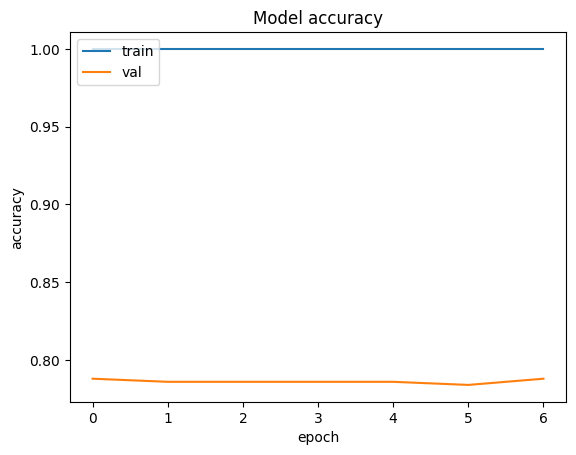

In [ ]:
plot_curves(history_4, "accuracy", "val_accuracy")

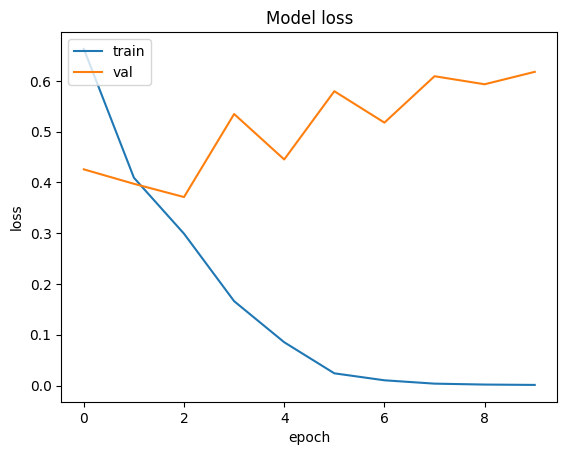

In [ ]:
plot_curves(history_4, "loss", "val_loss")

### **5. Evaluating our model.**

<Axes: >

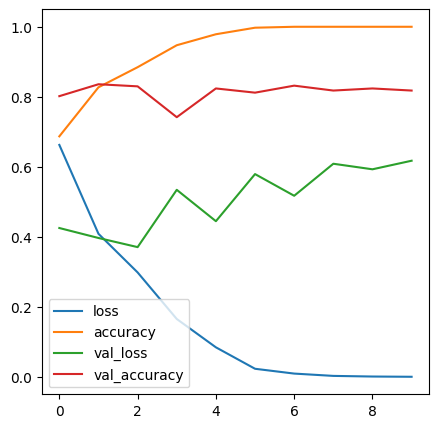

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize = (5, 5))

In [31]:
# Plotting validation and training curves seperatly.
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss.
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy.
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

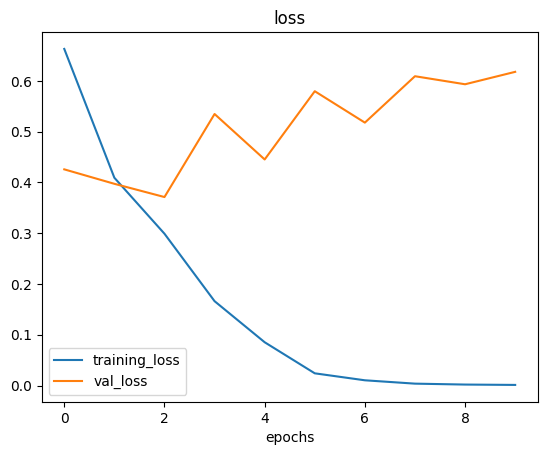

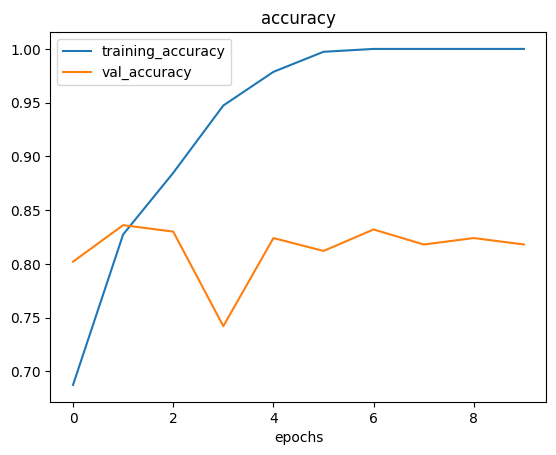

In [ ]:
# Checkout the loss and accuracy of model_4.
plot_loss_curve(history_4)

###Clearly, our model is overfitting, therefore we take certain majors to overcome this effect. 
How we do that?

1. Create a baseline model.
2. Overfitting the baseline model with larger model.
3. Reducing the overfitting.

How to induce overfitting?

1. Increase the number of Conv layers.
2. Increase the number of Conv filters.
3. Add another Dense layer to the output of flatten layer. 

How to reduce overfitting?

1. Add data agumentation.
2. Add regularization layers (MaxPool2D)
3. Add more data.

_______________________________________________________________

**Creating the baseline model.**

In [32]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")

])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_5 = model_5.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 193ms/step - loss: 0.6426 - accuracy: 0.6353 - val_loss: 0.5381 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4851 - accuracy: 0.7700 - val_loss: 0.4020 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4157 - accuracy: 0.8127 - val_loss: 0.3778 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4110 - accuracy: 0.8193 - val_loss: 0.3610 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3836 - accuracy: 0.8360 - val_loss: 0.4322 - val_accuracy: 0.7920


Model 4 v/s Model 5

In [ ]:
print("Model 4")
model_4.summary()

In [33]:
print("Model 5")
model_5.summary()

Model 5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 1

### Observe the reduction in the shape after adding maxpool layer. In total it took down the count of total parameters from 477k to just 8k.

Lets check the curves for evaluation of the model.

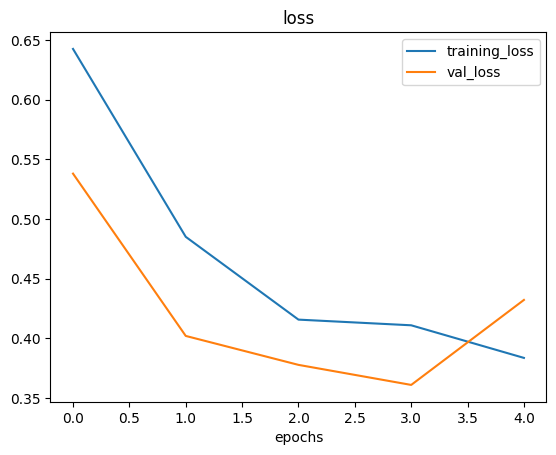

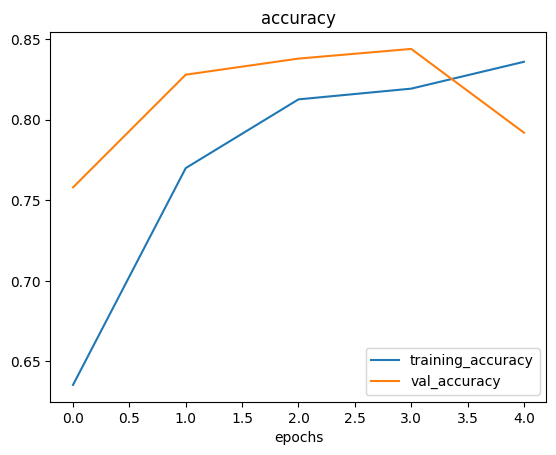

In [34]:
plot_loss_curve(history_5)

### **Data Augmentation**

In [35]:
# Create ImageDataGenerator training with data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale = 1./255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2, 
                                             zoom_range = 0.2, 
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create ImageDataGenerator without augmentation for train.
train_datagen = ImageDataGenerator(rescale = 1./255.)

# Create ImageDataGenerator without augmentation for test.
test_datagen = ImageDataGenerator(rescale = 1./255.)

Data augmentation is altering our training data, making it more diversive and allowing our model to learn more generalized patterns. Altering means adjusting certain things like rotating a image, flipping it, croping it etc.

**Lets visualise the data augmentation.**

In [36]:
from tensorflow._api.v2.random import shuffle
# Import data and augment it from training directory.
print("Augmented Train Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size=(224, 224), 
                                                                   batch_size=32, 
                                                                   class_mode="binary",
                                                                   shuffle=False)

# Non-augmented train data batches.
print("Non-Augmented Train Data")
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               batch_size=32, 
                                               class_mode="binary", 
                                               shuffle=False)

# Non-augmented test data batches.
print("Non-Augmented Test Data")
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224, 224), 
                                             batch_size=32, 
                                             class_mode="binary", 
                                             shuffle=False)

Augmented Train Data
Found 1500 images belonging to 2 classes.
Non-Augmented Train Data
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data
Found 500 images belonging to 2 classes.


**Note:** Data Augmentation is usually for training data. This is done by using `ImageDataGenerator`, here the images are kept as it is in our directories but are modified as they are loaded into the model.

**Now lets visualise the augmented data.**

In [37]:
images, labels = train_data.next()
augmentated_images, augmentated_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

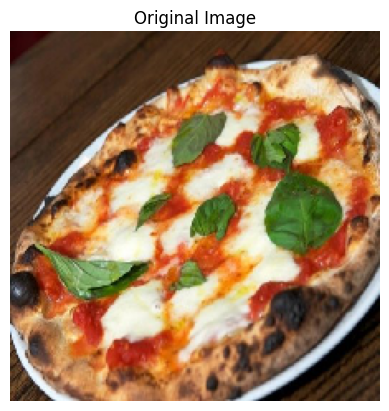

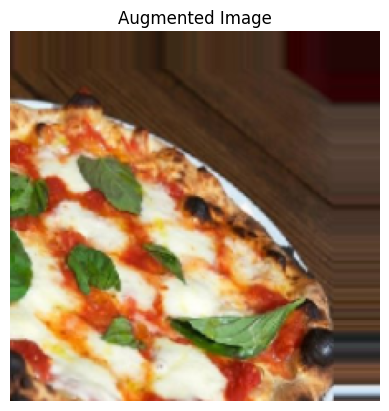

In [38]:
# Show the original image and augmented image.
import random

random_num = random.randint(0, 31) # Because batch size is 32.
plt.imshow(images[random_num])
plt.title("Original Image")
plt.axis(False)
plt.figure()

plt.imshow(augmentated_images[random_num])
plt.title("Augmented Image")
plt.axis(False)

### **Lets build a model using this augmented data.**

**Model 6**

In [39]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented, 
            epochs = 5, 
            steps_per_epoch = len(train_data_augmented), 
            validation_data = test_data, 
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 458ms/step - loss: 0.8268 - accuracy: 0.4760 - val_loss: 0.6846 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6947 - accuracy: 0.5087 - val_loss: 0.6749 - val_accuracy: 0.6920
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6980 - accuracy: 0.5367 - val_loss: 0.6674 - val_accuracy: 0.5480
Epoch 4/5
47/47 [==============================] - 21s 458ms/step - loss: 0.6786 - accuracy: 0.5967 - val_loss: 0.6338 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6622 - accuracy: 0.6287 - val_loss: 0.6504 - val_accuracy: 0.5160


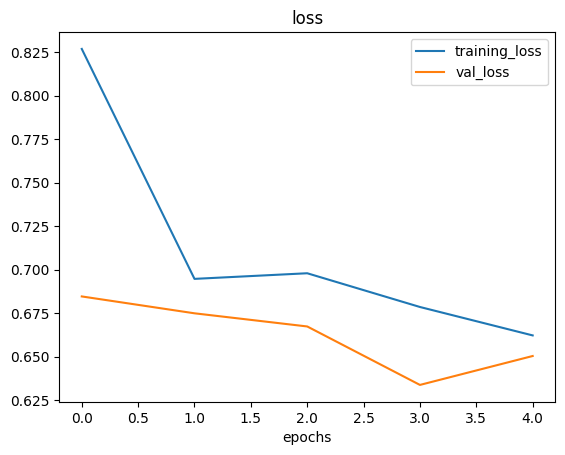

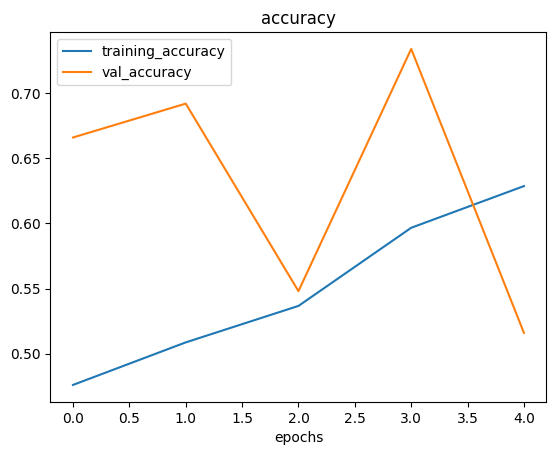

In [40]:
plot_loss_curve(history_6)

Let's try to shuffle the data this time, therefore, creating the new training augmented data.

In [41]:
from tensorflow._api.v2.random import shuffle
# Import data and augment it from training directory.
print("Augmented Train Data")
train_data_augmented_shuf = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size=(224, 224), 
                                                                   batch_size=32, 
                                                                   class_mode="binary",
                                                                   shuffle=True)

# Non-augmented train data batches.
print("Non-Augmented Train Data")
train_data_shuf = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               batch_size=32, 
                                               class_mode="binary", 
                                               shuffle=True)

# Non-augmented test data batches.
print("Non-Augmented Test Data")
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224, 224), 
                                             batch_size=32, 
                                             class_mode="binary", 
                                             shuffle=True)

Augmented Train Data
Found 1500 images belonging to 2 classes.
Non-Augmented Train Data
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data
Found 500 images belonging to 2 classes.


**Model 7**

In [42]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuf, 
            epochs = 5, 
            steps_per_epoch = len(train_data_augmented_shuf), 
            validation_data = test_data, 
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 461ms/step - loss: 0.6721 - accuracy: 0.5733 - val_loss: 0.6003 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6307 - accuracy: 0.6607 - val_loss: 0.4985 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5555 - accuracy: 0.7253 - val_loss: 0.4393 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.5225 - accuracy: 0.7407 - val_loss: 0.3783 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5089 - accuracy: 0.7667 - val_loss: 0.3545 - val_accuracy: 0.8660


As you can see shuffling of data did improve our model's accuracy on training and validation both.

# **Making predictions.**

In [44]:
print(class_names)

['pizza' 'steak']


--2023-05-15 20:16:12--  https://raw.githubusercontent.com/Kaushal-Top5699/tensorflow_cnn_cv/main/custom_images/steak01.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404420 (395K) [image/jpeg]
Saving to: ‘steak01.jpeg.1’

steak01.jpeg.1      100%[===================>] 394.94K  --.-KB/s    in 0.01s   

2023-05-15 20:16:12 (31.2 MB/s) - ‘steak01.jpeg.1’ saved [404420/404420]



(-0.5, 2499.5, 1667.5, -0.5)

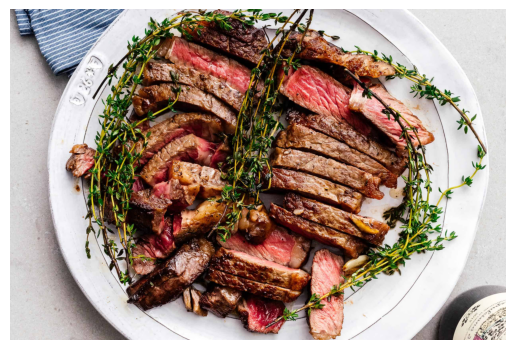

In [46]:
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/Kaushal-Top5699/tensorflow_cnn_cv/main/custom_images/steak01.jpeg
steak = mpimg.imread("steak01.jpeg")
plt.imshow(steak)
plt.axis(False)

In [51]:
# Checking shape.
steak.shape

(1668, 2500, 3)

In [54]:
expanded_steak = tf.expand_dims(steak, axis = 0)

Always remember we need to use same kind of preprocessing on the custome image as the model was trained on.

In [56]:
def load_prep_image(filename, image_shape = 224):
  img = tf.io.read_file(filename) # Read file.
  img = tf.image.decode_image(img) # Descode the image.
  img = tf.image.resize(img, size = [image_shape, image_shape]) # Resizing the image.
  img = img/225.
  return img

In [ ]:
# Load and preprocess the image.
steak = load_prep_image("steak01.jpeg")
steak

In [58]:
# Making predictions with model_7.
model_7.predict(tf.expand_dims(steak, axis = 0))

1/1 [==============================] - 0s 142ms/step


array([[0.9973303]], dtype=float32)